# RMS Titanic

O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.

Os destroços do Titanic foram procurados por décadas até serem encontrados em 1985 por uma equipe liderada por Robert Ballard. Ele se encontra a 3843 m de profundidade e a 650 km ao sudeste de Terra Nova no Canadá. Sua história e naufrágio permaneceram no imaginário popular durante décadas, levando a produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic de 1997. Até hoje o Titanic permanece como um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

Links interessantes:

https://www.kaggle.com/c/titanic
https://pt.wikipedia.org/wiki/RMS_Titanic


## Perguntas:
1. Qual o sexo da maioria que sobreviveu?
2. Qual o sexo da maioria que não sobreviveu?
3. Qual era a idade média dos passageiros dividida por sexo?
4. Qual o valor médio da tarifa paga pelos passageiros?
5. Qual a relação entre a tarifa paga e a idade dos passageiros?

# Conjunto de dados que será utilizado
O conjunto de dados que será utilizado será de Sexo, Idade, Sobrevivente, e tarifa

In [297]:
# Importação das bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [298]:
# Importação dos dados
labels = ['id', 'Sobrevivente', 'Classe', 'Nome', 'Sexo', 'Idade', 'SibSp', 'Parch', 'Ticket', 'Tarifa', 'Cabine', 'Embarque']
df = pd.read_csv('titanic-data-6.csv', header=0, names=labels)
#df = pd.read_csv('titanic-data-6.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
id              891 non-null int64
Sobrevivente    891 non-null int64
Classe          891 non-null int64
Nome            891 non-null object
Sexo            891 non-null object
Idade           714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Tarifa          891 non-null float64
Cabine          204 non-null object
Embarque        889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Limpeza dos dados
Com base na descrição dos dados obtidas acima, pode-se verificar que as colunas Idade, Cabine e Embarque não contém o total de linhas preenchidas com os dados como as outras, ou seja, contém algumas linhas com valores nulos. Será necessário realizar um procedimento para substituir os valores nulos pelo valor médio de cada uma dessas colunas.
Será adotado também, a remoção das colunas que não iremos trabalhar.

In [299]:
def acerta_indices(label):
    """
    def acerta_indices(label: string):

    Função para realizar o acerto dos índices de uma determinada coluna de um dataset
    Argumentos:
        label: nome da coluna que terá o índice ajustado
    Retorna:
        Não tem retorno
    """
    if (df[label].dtype == "object"):
        df[label].fillna('', inplace=True)
    else:
        mean = df[label].mean()
        df[label].fillna(mean, inplace=True)

In [300]:
# Acertando os índices
acerta_indices('Idade')

In [301]:
# Apagando as colunas que não serão utilizadas
del df['Classe']
del df['Nome']
del df['SibSp']
del df['Parch']
del df['Ticket']
del df['Cabine']
del df['Embarque']

In [302]:
# Verifica se acertou os índices
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
id              891 non-null int64
Sobrevivente    891 non-null int64
Sexo            891 non-null object
Idade           891 non-null float64
Tarifa          891 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [303]:
# Verifica se existem registros duplicados e elimina-os em caso positivo
if (sum(df.duplicated()) > 0):
    df.drop_duplicates(inplace=True)

In [304]:
# Verifica uma amostra dos dados
df.head()

,id,Sobrevivente,Sexo,Idade,Tarifa
0,1,0,male,22.0,7.2500
1,2,1,female,38.0,71.2833
2,3,1,female,26.0,7.9250
3,4,1,female,35.0,53.1000
4,5,0,male,35.0,8.0500


In [305]:
# Gera uma estatística do dado 'Sobrevivente'
df['Sobrevivente'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sobrevivente, dtype: float64

In [306]:
# Gera uma estatística do dado 'Sexo'
df['Sexo'].describe()

count      891
unique       2
top       male
freq       577
Name: Sexo, dtype: object

In [307]:
# Gera uma estatística do dado 'Idade'
df['Idade'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Idade, dtype: float64

In [308]:
# Gera uma estatística do dado 'Tarifa'
df['Tarifa'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Tarifa, dtype: float64

In [309]:
# Lista os dados únicos de alguns parâmetros
"Sobrevivente:{0}, Sexo:{1}, Idade:{2}, Tarifa:{3}".format(
    len(df['Sobrevivente'].value_counts().index), 
    len(df['Sexo'].value_counts().index),
    len(df['Idade'].value_counts().index),
    len(df['Tarifa'].value_counts().index))

'Sobrevivente:2, Sexo:2, Idade:89, Tarifa:248'

In [310]:
# Imprime a média da idade dos passageiros
"Idade Média dos Passageiros = {0}".format(df['Idade'].mean())

'Idade Média dos Passageiros = 29.699117647058763'

In [311]:
# Imprime a média da idade dos passageiros
"Tarifa Média paga pelos Passageiros = {0}".format(df['Tarifa'].mean())

'Tarifa Média paga pelos Passageiros = 32.2042079685746'

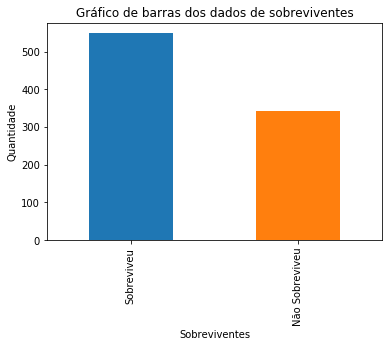

In [312]:
# Gráfico de barras dos dados de sobrevientes
ind = df['Sobrevivente'].value_counts().index;
ax = df['Sobrevivente'].value_counts()[ind].plot(kind='bar', title='Gráfico de barras dos dados de sobreviventes');
ax.set_xlabel('Sobreviventes');
ax.set_ylabel('Quantidade');
ax.set_xticklabels(['Sobreviveu', 'Não Sobreviveu']);


O gráfico acima mostra que a maioria dos passageiros não sobreviveu

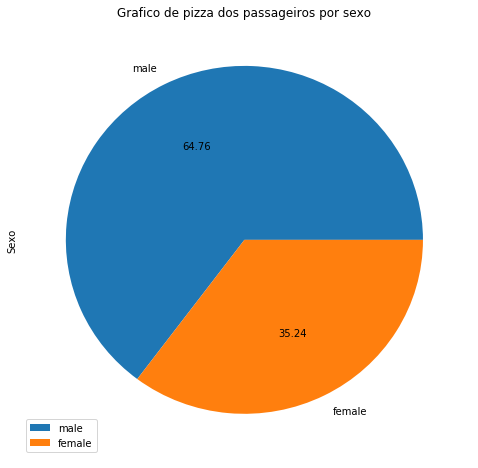

In [313]:
# Gráfico de pizza com dados do sexo dos passageiros
ind = df['Sexo'].value_counts().index
df['Sexo'].value_counts()[ind].plot(kind='pie', autopct='%.2f', title="Grafico de pizza dos passageiros por sexo", figsize=(8,8));
plt.legend(['male', 'female'],loc=3);

O Gráfico acima mostra que a maioria dos passageiros era do sexo masculino

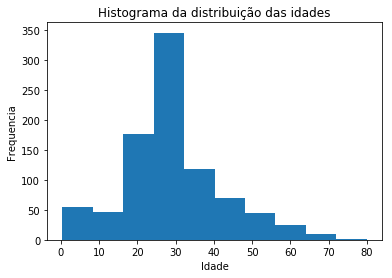

In [314]:
# Histograma com a relação das idades dos passageiros
hist_idade = plt.hist(df['Idade'], bins=10)
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.title('Histograma da distribuição das idades')
plt.show()

O Histograma acima mostra que a idade média dos passageiros fica entre 25 e 30 anos

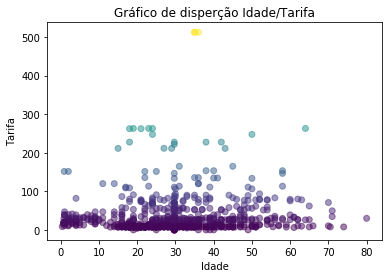

In [315]:
# Gráfico de disperção com relação entre idade e valor pago de tarifa
disp = plt.scatter(df['Idade'], df['Tarifa'], alpha=0.5, c=df['Tarifa'])
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.title('Gráfico de disperção Idade/Tarifa')
plt.show()

Apenas para efeito de curiosidade, não sendo relevante para nosso estudo, o gráfico acima mostra que a maioria dos passageiros pagou abaixo de 100.00 de tarifa para embarcar no navio.

In [316]:
# Preparação para criar gráficos de distribuição
df_sex_m = df[df['Sexo'] == 'male']
df_sex_f = df[df['Sexo'] == 'female']

df_sob_s = df[df['Sobrevivente'] == 1]
df_sob_n = df[df['Sobrevivente'] == 0]

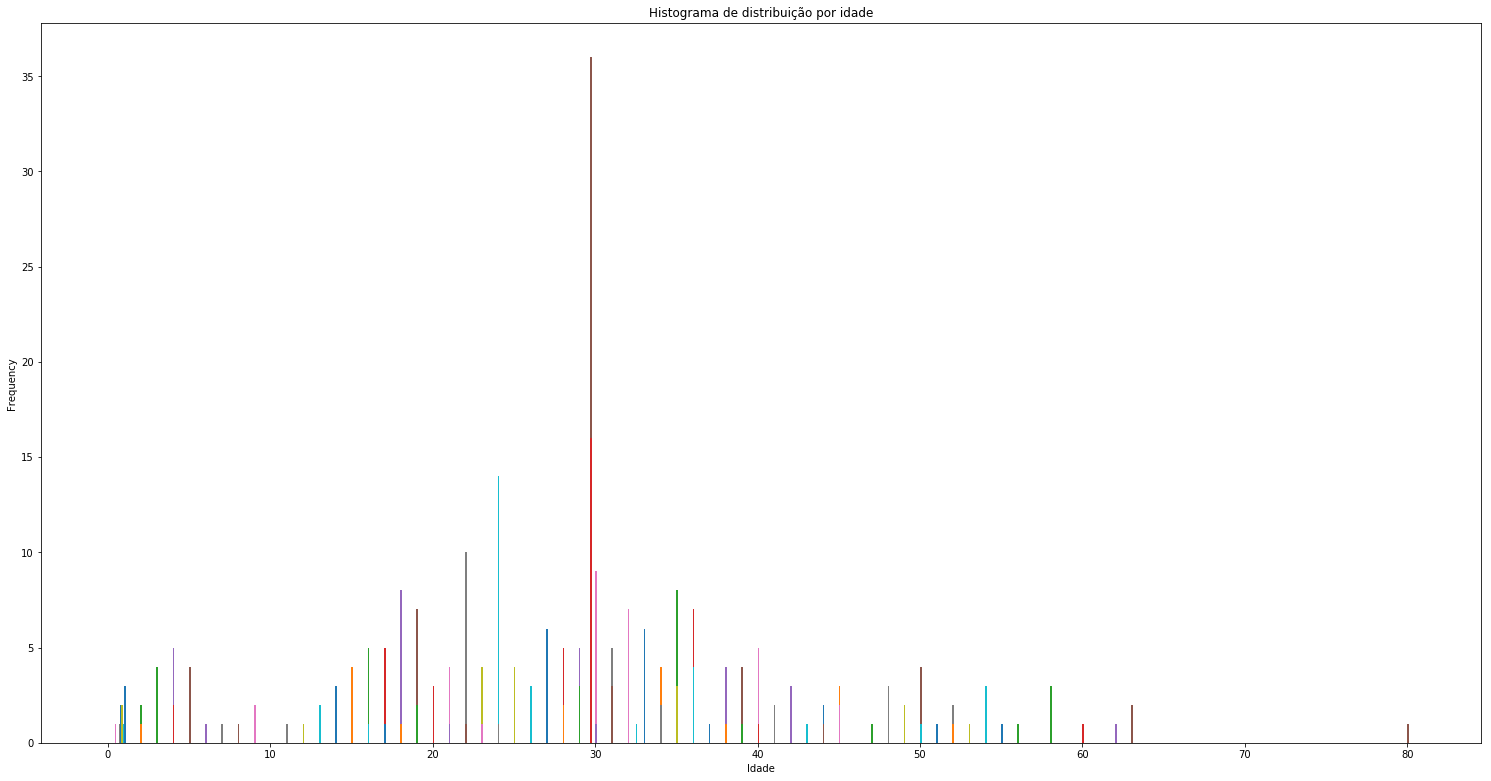

In [326]:
a = plt.axes([0, 0, 1, 1], xlabel='Idade', ylabel='Frequencia')
ax = df_sob_s.groupby(['Sexo', 'Idade'],as_index=False)['Idade'].plot(kind="hist", title="Histograma de distribuição por idade");

No histograma de distribuiçãoIdade associada a sobrevivencia, podemos ver claramente que a maioria tem idade de 29 anos.

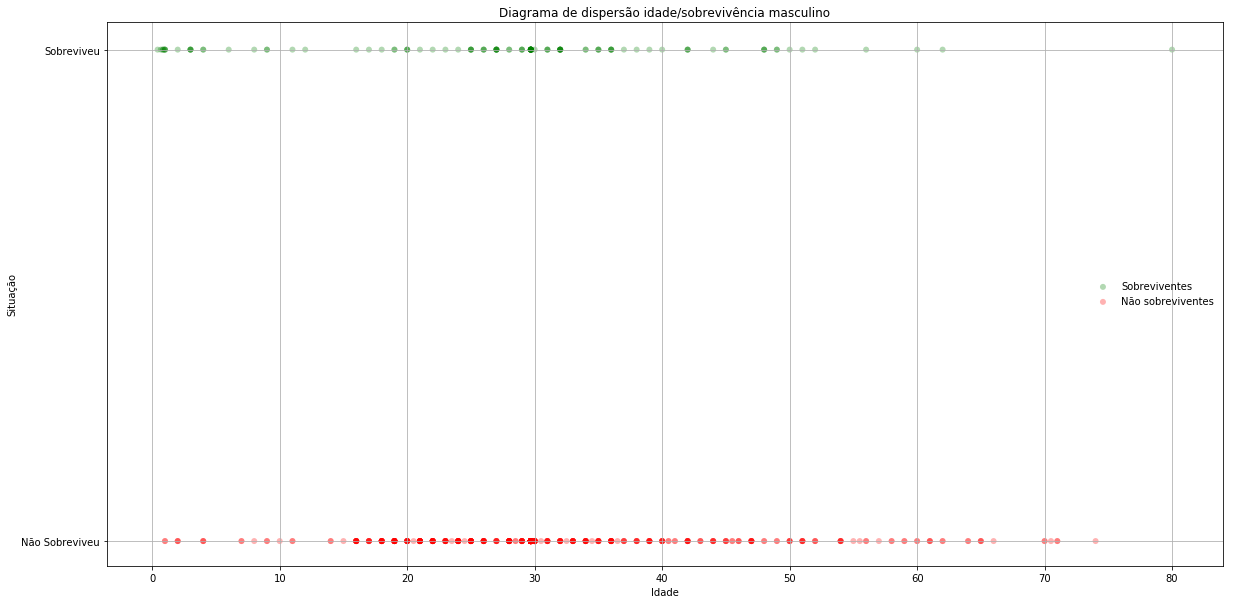

In [331]:
# Gráfico
#df_sex_f.plot(kind='scatter', y='Sobrevivente', x='Idade', title="Diagrama de dispersão idade/sobrevivência masculino", legend=True, grid=True, yticks=[0,1]);
fig, ax = plt.subplots()
df_filter = df_sex_m[df_sex_m['Sobrevivente'] == 1]
ax.scatter(x=df_filter['Idade'], y=df_filter['Sobrevivente'], c='green', label='Sobreviventes', alpha=0.3, edgecolors='none')

df_filter = df_sex_m[df_sex_m['Sobrevivente'] == 0]
ax.scatter(x=df_filter['Idade'], y=df_filter['Sobrevivente'], c='red', label='Não sobreviventes', alpha=0.3, edgecolors='none')

ax.legend()
ax.legend(loc='center right', frameon=False)
ax.grid(True)
plt.yticks([0,1], ('Não Sobreviveu', 'Sobreviveu'))
plt.xlabel('Idade')
plt.ylabel('Situação')
plt.title('Diagrama de dispersão idade/sobrevivência masculino')

plt.show()

Diagramas de dispersão da Idade associada a sobrevivencia para o grupo masculino

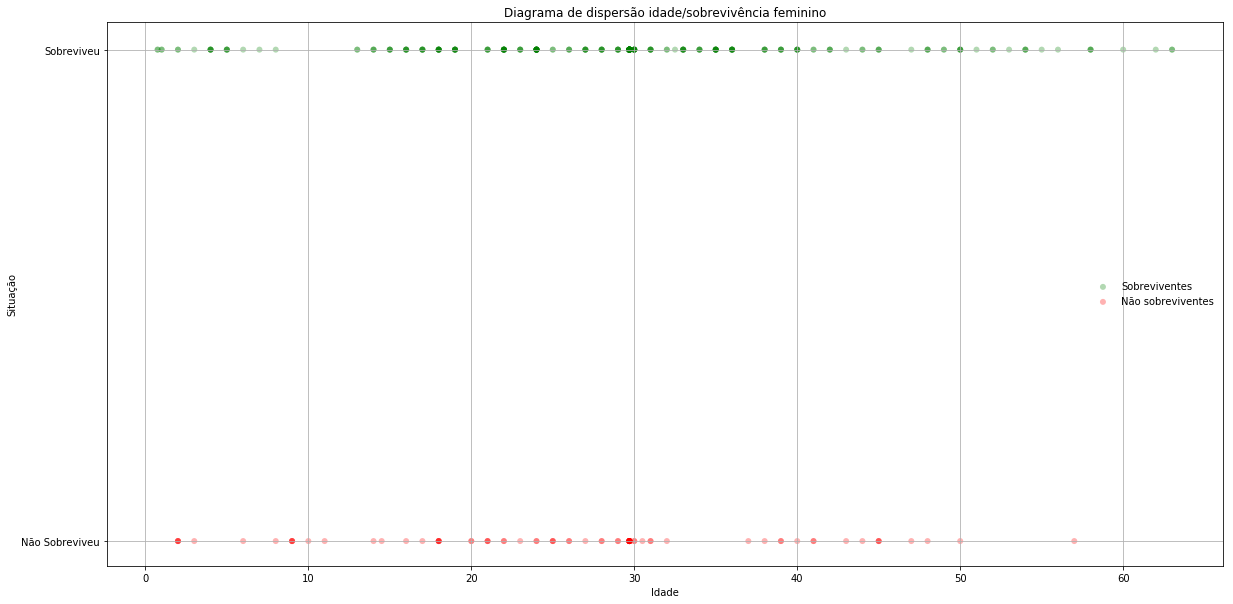

In [332]:
fig, ax = plt.subplots()
df_filter = df_sex_f[df_sex_f['Sobrevivente'] == 1]
ax.scatter(x=df_filter['Idade'], y=df_filter['Sobrevivente'], c='green', label='Sobreviventes', alpha=0.3, edgecolors='none')

df_filter = df_sex_f[df_sex_f['Sobrevivente'] == 0]
ax.scatter(x=df_filter['Idade'], y=df_filter['Sobrevivente'], c='red', label='Não sobreviventes', alpha=0.3, edgecolors='none')

ax.legend()
ax.legend(loc='center right', frameon=False)
ax.grid(True)
plt.yticks([0,1], ('Não Sobreviveu', 'Sobreviveu'))
plt.xlabel('Idade')
plt.ylabel('Situação')
plt.title('Diagrama de dispersão idade/sobrevivência feminino')

plt.show()

Analisando os gráficos acima, podemos verificar que a maioria dos sobreviventes foram mulheres de qualquer idade e crianças de qualquer sexo. 
Para entender os gráficos acima a linha de cima indica os sobreviventes e a linha de baixo indica os não sobreviventes.
No primeiro gráfico, podemos ver que as linhas de cima estão concentradas da esquerda para o centro, indicando que a maioria que sobreviveu no universo feminino foram a de qualquer idade.
No segundo gráfico, podemos ver como o deslocamento das linhas da idade no universo masculino tendem para esquerda, indicando que a maioria que sobreviveu entre os homens foram crianças.

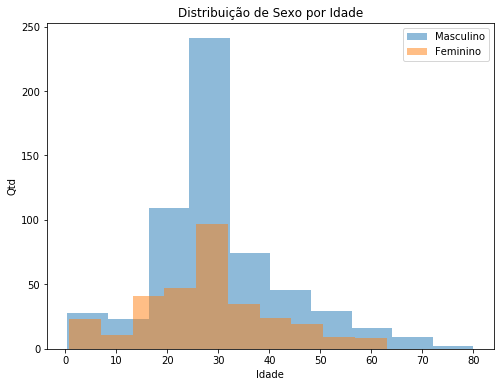

In [320]:
# Gráfico de distribuição entre sexo e idade dos passageiros
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df_sex_m['Idade'], alpha=0.5, label='Masculino')
ax.hist(df_sex_f['Idade'], alpha=0.5, label='Feminino')
ax.set_title('Distribuição de Sexo por Idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Qtd')
ax.legend(loc='upper right')
plt.show()

No gráfico de Distribuição de sexo por idade, podemos ver a sobreposição do gráfico masculino sobre o feminino e vemos que a maioria do grupo masculino coincide com a maioria do grupo masculino e é de quem tem idades entre 25 e 30 anos.

In [321]:
# Dados relativos aos sobreviventes e o sexo deles
df_sob_s['Sexo'].value_counts()

female    233
male      109
Name: Sexo, dtype: int64

In [322]:
# Dados relativos aos não sobreviventes e o sexo deles
df_sob_n['Sexo'].value_counts()

male      468
female     81
Name: Sexo, dtype: int64

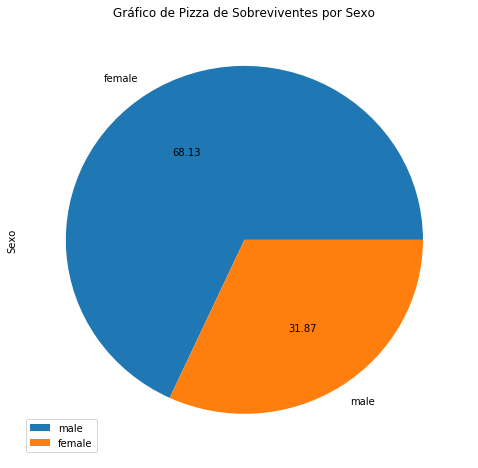

In [323]:
# Gráfico de pizza que mostra a relação entre os sobreviventes e o sexo deles
ind = df_sob_s['Sexo'].value_counts().index
df_sob_s['Sexo'].value_counts()[ind].plot(kind='pie', autopct='%.2f', title='Gráfico de Pizza de Sobreviventes por Sexo', figsize=(8,8));
plt.legend(['male', 'female'],loc=3);

No gráfico acima, vemos que a maioria que sobreviveu é do sexo feminino

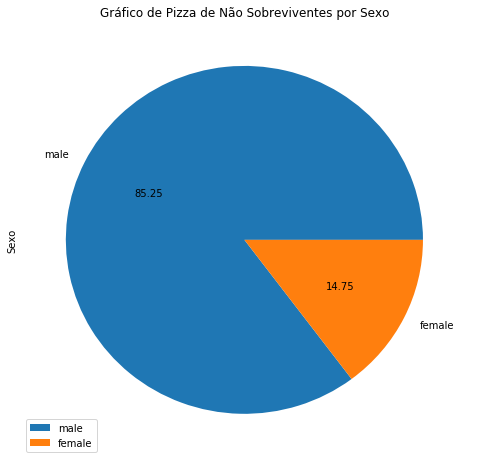

In [324]:
# Gráfico de pizza que mostra a relação entre os não sobreviventes e o sexo deles
ind = df_sob_n['Sexo'].value_counts().index
df_sob_n['Sexo'].value_counts()[ind].plot(kind='pie', autopct='%.2f', title='Gráfico de Pizza de Não Sobreviventes por Sexo', figsize=(8,8));
plt.legend(['male', 'female'],loc=3);

No gráfico acima, vemos que a maioria que não sobreviveu é do sexo masculino

1. Qual o sexo da maioria que sobreviveu?
    Feminino
    
2. Qual o sexo da maioria que não sobreviveu?
    Masculino
    
3. Qual a idade media dos passageiros?
    29
    
4. Qual o valor médio da tarifa paga pelos passageiros?
    32.20
    
5. Qual a relação entre a tarifa paga e a idade dos passageiros?
    Entre 20 e 50 anos de idade houve uma concentração maior de indivíduos que pagaram um valor abaixo de 100.00.
    

# Conclusão
Podemos conferir que as perguntas foram respondidas após realizarmos uma filtragem dos dados com os quais decidimos trabalhar e contando também, com a ajuda de alguns gráficos que fazem com que as respostas sejam esclarecidas de forma mais fácil. 
Baseado nas respostas obtidas as perguntas levantadas, podemos verificar que a maioria dos sobreviventes foram crianças de qualquer sexo e mulheres de qualquer idade. Podemos então, suspeitar que esse fato se deve a prioridade que foi adotada para liberar as pessoas para entrar nos barcos.


## Limitações

Foi encontrado como fator limitante para nossa análise, algumas propriedades que não possuiam valores preenchidos para alguns passageiros. As propriedades foram para os dados de Idade, Cabine e Embarque.

    1. Medida Tomada:
        1.1 Os dados de Cabine e Embarque, bem como outras propriedades que não fazem parte da nossa análise foram removidas da massa de dados.
        1.2 Para os dados de idade faltantes, foram substituídos pela média da soma dos dados idade dos passageiros.
